In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pyfiglet as pyf
print(pyf.figlet_format('KELOMPOK 3 :'))

print(pyf.figlet_format('-----------'))

print(pyf.figlet_format('FAVO.ID'))

print('''1. Ahmad Ihda Falah Annur (1206220015)
2. Talitha Rahmadewati Witanto (1206220022)
3. Rofiatun Nadifah (1206220025)
4. Sutan Al-Razak E. (1206220040)''')

print(pyf.figlet_format('-----------'))

 _  _______ _     ___  __  __ ____   ___  _  __  _____     
| |/ / ____| |   / _ \|  \/  |  _ \ / _ \| |/ / |___ /   _ 
| ' /|  _| | |  | | | | |\/| | |_) | | | | ' /    |_ \  (_)
| . \| |___| |__| |_| | |  | |  __/| |_| | . \   ___) |  _ 
|_|\_\_____|_____\___/|_|  |_|_|    \___/|_|\_\ |____/  (_)
                                                           

                                                                   
                                                                   
 _____ _____ _____ _____ _____ _____ _____ _____ _____ _____ _____ 
|_____|_____|_____|_____|_____|_____|_____|_____|_____|_____|_____|
                                                                   
                                                                   

 _____ ___     _____   ___ ____  
|  ___/ \ \   / / _ \ |_ _|  _ \ 
| |_ / _ \ \ / / | | | | || | | |
|  _/ ___ \ V /| |_| | | || |_| |
|_|/_/   \_\_/  \___(_)___|____/ 
                                 

1. Ahmad Ihda Falah Annur

In [3]:
print(pyf.figlet_format('1. TAHAPAN WEB SCRAPPING'))

print(pyf.figlet_format('-----------'))

 _     _____  _    _   _    _    ____   _    _   _  __        _______ ____  
/ |   |_   _|/ \  | | | |  / \  |  _ \ / \  | \ | | \ \      / / ____| __ ) 
| |     | | / _ \ | |_| | / _ \ | |_) / _ \ |  \| |  \ \ /\ / /|  _| |  _ \ 
| |_    | |/ ___ \|  _  |/ ___ \|  __/ ___ \| |\  |   \ V  V / | |___| |_) |
|_(_)   |_/_/   \_\_| |_/_/   \_\_| /_/   \_\_| \_|    \_/\_/  |_____|____/ 
                                                                            
 ____   ____ ____      _    ____  ____ ___ _   _  ____ 
/ ___| / ___|  _ \    / \  |  _ \|  _ \_ _| \ | |/ ___|
\___ \| |   | |_) |  / _ \ | |_) | |_) | ||  \| | |  _ 
 ___) | |___|  _ <  / ___ \|  __/|  __/| || |\  | |_| |
|____/ \____|_| \_\/_/   \_\_|   |_|  |___|_| \_|\____|
                                                       

                                                                   
                                                                   
 _____ _____ _____ _____ _____ _____ _____ _____ _____ _____ ____

In [4]:
url = "https://favo.id/collections/"
req = requests.get(url)
soup = BeautifulSoup(req.text, "html.parser")
print(soup.title.text)

Koleksi | FAVO


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

def scrape_data(url, category):
    scraped_data = []

    req = requests.get(url)
    soup = BeautifulSoup(req.text, "html.parser")
    card_desc = soup.find_all('li', class_='grid__item')

    for row in card_desc:
        nama = row.find_all('h4', class_='card__heading h5')
        if nama:
            nama = nama[0].text.strip()
        else:
            nama = np.nan

        harga_sekarang = row.find_all('span', class_='price-item price-item--sale price-item--last')
        if harga_sekarang:
            harga_sekarang = harga_sekarang[0].text.strip()
        else:
            harga_sekarang = np.nan

        harga_reguler = row.find_all('s', class_='price-item price-item--regular')
        if harga_reguler:
            harga_reguler = harga_reguler[0].text.strip()
        else:
            harga_reguler = np.nan

        diskonpersen = row.find_all('span', class_='product-card-discount fs-caption small')
        if diskonpersen:
            diskonpersen = diskonpersen[0].text.strip()
        else:
            diskonpersen = np.nan

        hematdiskon = row.find_all('span', class_='product-card-discount fs-caption small save')
        if hematdiskon:
            hematdiskon = hematdiskon[0].text.strip()
        else:
            hematdiskon = np.nan

        rating = row.find_all('p', class_='rating-text caption')
        if rating:
            rating = rating[0].text.strip()
        else:
            rating = np.nan

        ulasan = row.find_all('p', class_='rating-count caption')
        if ulasan:
            ulasan = ulasan[0].text.strip()
        else:
            ulasan = np.nan

        stok = row.find_all('div', class_='overlay-soldout')
        if stok:
            stok = stok[0].span.text.strip()
        else:
            stok = np.nan

        image_link = row.find_all('div', class_='card card--standard card--media')
        for image in image_link:
            gambar = image.find('a')['href']
            if gambar:
                gambar = f'https://favo.id' + gambar.strip()
            else:
                gambar = np.nan

        scraped_data.append({'Nama Produk': nama,
                             'Kategori': category,
                             'Harga Sekarang': harga_sekarang,
                             'Harga Reguler': harga_reguler,
                             'Diskon (%)': diskonpersen,
                             'Hemat Diskon': hematdiskon,
                             'Rating': rating,
                             'Ulasan': ulasan,
                             'Stok Barang': stok,
                             'URL Produk': gambar})

    data = pd.DataFrame(scraped_data)
    return data

def scrape_all_kategori():
    sorting_parameters = ['wanita', 'ibu-anak', 'pria', 'perlengkapan-rumah','promo', 'kesehatan', 'asmaraku']
    all_data = []

    for parameter in sorting_parameters:
        for i in range(1, 33):  # Ubah angka sesuai dengan jumlah halaman yang ingin di scrape
            url = f"https://favo.id/collections/{parameter}?page={i}"
            data = scrape_data(url, parameter)
            all_data.append(data)
            print(url)

    result_data = pd.concat(all_data, ignore_index=True)
    return result_data

data_favo = scrape_all_kategori()
#data_favo

https://favo.id/collections/wanita?page=1
https://favo.id/collections/wanita?page=2
https://favo.id/collections/wanita?page=3
https://favo.id/collections/wanita?page=4
https://favo.id/collections/wanita?page=5
https://favo.id/collections/wanita?page=6
https://favo.id/collections/wanita?page=7
https://favo.id/collections/wanita?page=8
https://favo.id/collections/wanita?page=9
https://favo.id/collections/wanita?page=10
https://favo.id/collections/wanita?page=11
https://favo.id/collections/wanita?page=12
https://favo.id/collections/wanita?page=13
https://favo.id/collections/wanita?page=14
https://favo.id/collections/wanita?page=15
https://favo.id/collections/wanita?page=16
https://favo.id/collections/wanita?page=17
https://favo.id/collections/wanita?page=18
https://favo.id/collections/wanita?page=19
https://favo.id/collections/wanita?page=20
https://favo.id/collections/wanita?page=21
https://favo.id/collections/wanita?page=22
https://favo.id/collections/wanita?page=23
https://favo.id/coll

In [6]:
data_favo

,Nama Produk,Kategori,Harga Sekarang,Harga Reguler,Diskon (%),Hemat Diskon,Rating,Ulasan,Stok Barang,URL Produk
0,Eucalie Organic Anti Aging Package,wanita,Rp 566.400,Rp 568.000,0%,(Hemat Rp 1.600),NaN,NaN,NaN,https://favo.id/products/eucalie-organic-anti-...
1,Eucalie Exclusive Anti Aging Package,wanita,Rp 536.400,Rp 547.000,1%,(Hemat Rp 10.600),NaN,NaN,NaN,https://favo.id/products/eucalie-exclusive-ant...
2,Avoskin Advance Action Eye Ampoule - 12 mL,wanita,Rp 185.800,Rp 214.800,13%,(Hemat Rp 29.000),NaN,NaN,NaN,https://favo.id/products/avoskin-advance-actio...
3,Avoskin Intensive Nourishing Eye Cream - 10 gr,wanita,Rp 133.800,Rp 171.600,22%,(Hemat Rp 37.800),NaN,NaN,Habis,https://favo.id/products/avoskin-intensive-nou...
4,Sebamed Clear Face Foam - 150 ML,wanita,Rp 244.500,Rp 276.800,11%,(Hemat Rp 32.300),5.0 / 5.0,(1)\n1 ulasan keseluruhan,NaN,https://favo.id/products/sebamed-clear-face-fo...
...,...,...,...,...,...,...,...,...,...,...
4145,Jo Cocktails Mimosa Personal Lubricant - 60 mL,asmaraku,Rp 216.700,Rp 260.000,16%,(Hemat Rp 43.300),NaN,NaN,Habis,https://favo.id/products/jo-cocktails-mimosa-p...
4146,Jo Cocktails Mai Tai Personal Lubricant - 60 mL,asmaraku,Rp 216.700,Rp 260.000,16%,(Hemat Rp 43.300),NaN,NaN,Habis,https://favo.id/products/jo-cocktails-mai-tai-...
4147,Jo Cocktails Cosmopolitan Personal Lubricant ...,asmaraku,Rp 216.700,Rp 260.000,16%,(Hemat Rp 43.300),NaN,NaN,Habis,https://favo.id/products/jo-cocktails-cosmopol...
4148,Jo Cocktails Mojito Personal Lubricant - 60 mL,asmaraku,Rp 216.700,Rp 260.000,16%,(Hemat Rp 43.300),NaN,NaN,Habis,https://favo.id/products/jo-cocktails-mojito-p...


In [134]:
print(pyf.figlet_format('2. HANDLING MISSING VALUE'))

print(pyf.figlet_format('-----------'))

 ____      _   _    _    _   _ ____  _     ___ _   _  ____ 
|___ \    | | | |  / \  | \ | |  _ \| |   |_ _| \ | |/ ___|
  __) |   | |_| | / _ \ |  \| | | | | |    | ||  \| | |  _ 
 / __/ _  |  _  |/ ___ \| |\  | |_| | |___ | || |\  | |_| |
|_____(_) |_| |_/_/   \_\_| \_|____/|_____|___|_| \_|\____|
                                                           
 __  __ ___ ____ ____ ___ _   _  ____  __     ___    _    _   _ _____ 
|  \/  |_ _/ ___/ ___|_ _| \ | |/ ___| \ \   / / \  | |  | | | | ____|
| |\/| || |\___ \___ \| ||  \| | |  _   \ \ / / _ \ | |  | | | |  _|  
| |  | || | ___) |__) | || |\  | |_| |   \ V / ___ \| |__| |_| | |___ 
|_|  |_|___|____/____/___|_| \_|\____|    \_/_/   \_\_____\___/|_____|
                                                                      

                                                                   
                                                                   
 _____ _____ _____ _____ _____ _____ _____ _____ _____ _____ _____ 
|_____|__

In [290]:
df = data_favo.copy()

In [291]:
df.loc[df['Harga Reguler']=="",'Harga Reguler']= np.nan

In [292]:
df.isnull().mean() * 100

Nama Produk        0.000000
Kategori           0.000000
Harga Sekarang     0.000000
Harga Reguler      2.746988
Diskon (%)         0.000000
Hemat Diskon       0.000000
Rating            77.783133
Ulasan            77.783133
Stok Barang       68.578313
URL Produk         0.000000
dtype: float64

In [293]:
# Preprocessing Kolom Harga Regular
df['Harga Reguler']=df['Harga Reguler'].str.strip('Rp').str.strip().str.replace(".",'',regex=False)
df.loc[df['Harga Reguler']=="",'Harga Reguler']= np.nan
df['Harga Reguler']=df['Harga Reguler'].astype("Int64")
df

,Nama Produk,Kategori,Harga Sekarang,Harga Reguler,Diskon (%),Hemat Diskon,Rating,Ulasan,Stok Barang,URL Produk
0,Eucalie Organic Anti Aging Package,wanita,Rp 566.400,568000,0%,(Hemat Rp 1.600),NaN,NaN,NaN,https://favo.id/products/eucalie-organic-anti-...
1,Eucalie Exclusive Anti Aging Package,wanita,Rp 536.400,547000,1%,(Hemat Rp 10.600),NaN,NaN,NaN,https://favo.id/products/eucalie-exclusive-ant...
2,Avoskin Advance Action Eye Ampoule - 12 mL,wanita,Rp 185.800,214800,13%,(Hemat Rp 29.000),NaN,NaN,NaN,https://favo.id/products/avoskin-advance-actio...
3,Avoskin Intensive Nourishing Eye Cream - 10 gr,wanita,Rp 133.800,171600,22%,(Hemat Rp 37.800),NaN,NaN,Habis,https://favo.id/products/avoskin-intensive-nou...
4,Sebamed Clear Face Foam - 150 ML,wanita,Rp 244.500,276800,11%,(Hemat Rp 32.300),5.0 / 5.0,(1)\n1 ulasan keseluruhan,NaN,https://favo.id/products/sebamed-clear-face-fo...
...,...,...,...,...,...,...,...,...,...,...
4145,Jo Cocktails Mimosa Personal Lubricant - 60 mL,asmaraku,Rp 216.700,260000,16%,(Hemat Rp 43.300),NaN,NaN,Habis,https://favo.id/products/jo-cocktails-mimosa-p...
4146,Jo Cocktails Mai Tai Personal Lubricant - 60 mL,asmaraku,Rp 216.700,260000,16%,(Hemat Rp 43.300),NaN,NaN,Habis,https://favo.id/products/jo-cocktails-mai-tai-...
4147,Jo Cocktails Cosmopolitan Personal Lubricant ...,asmaraku,Rp 216.700,260000,16%,(Hemat Rp 43.300),NaN,NaN,Habis,https://favo.id/products/jo-cocktails-cosmopol...
4148,Jo Cocktails Mojito Personal Lubricant - 60 mL,asmaraku,Rp 216.700,260000,16%,(Hemat Rp 43.300),NaN,NaN,Habis,https://favo.id/products/jo-cocktails-mojito-p...


In [294]:
# Preprocessing Kolom Harga Sekarang
df['Harga Sekarang'] = df['Harga Sekarang'].str.strip('Rp').str.strip().str.replace(".",'',regex=False)
df['Harga Sekarang'] = df['Harga Sekarang'].astype("Int64")
df

,Nama Produk,Kategori,Harga Sekarang,Harga Reguler,Diskon (%),Hemat Diskon,Rating,Ulasan,Stok Barang,URL Produk
0,Eucalie Organic Anti Aging Package,wanita,566400,568000,0%,(Hemat Rp 1.600),NaN,NaN,NaN,https://favo.id/products/eucalie-organic-anti-...
1,Eucalie Exclusive Anti Aging Package,wanita,536400,547000,1%,(Hemat Rp 10.600),NaN,NaN,NaN,https://favo.id/products/eucalie-exclusive-ant...
2,Avoskin Advance Action Eye Ampoule - 12 mL,wanita,185800,214800,13%,(Hemat Rp 29.000),NaN,NaN,NaN,https://favo.id/products/avoskin-advance-actio...
3,Avoskin Intensive Nourishing Eye Cream - 10 gr,wanita,133800,171600,22%,(Hemat Rp 37.800),NaN,NaN,Habis,https://favo.id/products/avoskin-intensive-nou...
4,Sebamed Clear Face Foam - 150 ML,wanita,244500,276800,11%,(Hemat Rp 32.300),5.0 / 5.0,(1)\n1 ulasan keseluruhan,NaN,https://favo.id/products/sebamed-clear-face-fo...
...,...,...,...,...,...,...,...,...,...,...
4145,Jo Cocktails Mimosa Personal Lubricant - 60 mL,asmaraku,216700,260000,16%,(Hemat Rp 43.300),NaN,NaN,Habis,https://favo.id/products/jo-cocktails-mimosa-p...
4146,Jo Cocktails Mai Tai Personal Lubricant - 60 mL,asmaraku,216700,260000,16%,(Hemat Rp 43.300),NaN,NaN,Habis,https://favo.id/products/jo-cocktails-mai-tai-...
4147,Jo Cocktails Cosmopolitan Personal Lubricant ...,asmaraku,216700,260000,16%,(Hemat Rp 43.300),NaN,NaN,Habis,https://favo.id/products/jo-cocktails-cosmopol...
4148,Jo Cocktails Mojito Personal Lubricant - 60 mL,asmaraku,216700,260000,16%,(Hemat Rp 43.300),NaN,NaN,Habis,https://favo.id/products/jo-cocktails-mojito-p...


In [295]:
# Mengganti Nilai NaN di kolom Harga Regular dengan Nilai Harga Sekarang
df['Harga Reguler'] = df['Harga Reguler'].fillna(df['Harga Sekarang'])
df

,Nama Produk,Kategori,Harga Sekarang,Harga Reguler,Diskon (%),Hemat Diskon,Rating,Ulasan,Stok Barang,URL Produk
0,Eucalie Organic Anti Aging Package,wanita,566400,568000,0%,(Hemat Rp 1.600),NaN,NaN,NaN,https://favo.id/products/eucalie-organic-anti-...
1,Eucalie Exclusive Anti Aging Package,wanita,536400,547000,1%,(Hemat Rp 10.600),NaN,NaN,NaN,https://favo.id/products/eucalie-exclusive-ant...
2,Avoskin Advance Action Eye Ampoule - 12 mL,wanita,185800,214800,13%,(Hemat Rp 29.000),NaN,NaN,NaN,https://favo.id/products/avoskin-advance-actio...
3,Avoskin Intensive Nourishing Eye Cream - 10 gr,wanita,133800,171600,22%,(Hemat Rp 37.800),NaN,NaN,Habis,https://favo.id/products/avoskin-intensive-nou...
4,Sebamed Clear Face Foam - 150 ML,wanita,244500,276800,11%,(Hemat Rp 32.300),5.0 / 5.0,(1)\n1 ulasan keseluruhan,NaN,https://favo.id/products/sebamed-clear-face-fo...
...,...,...,...,...,...,...,...,...,...,...
4145,Jo Cocktails Mimosa Personal Lubricant - 60 mL,asmaraku,216700,260000,16%,(Hemat Rp 43.300),NaN,NaN,Habis,https://favo.id/products/jo-cocktails-mimosa-p...
4146,Jo Cocktails Mai Tai Personal Lubricant - 60 mL,asmaraku,216700,260000,16%,(Hemat Rp 43.300),NaN,NaN,Habis,https://favo.id/products/jo-cocktails-mai-tai-...
4147,Jo Cocktails Cosmopolitan Personal Lubricant ...,asmaraku,216700,260000,16%,(Hemat Rp 43.300),NaN,NaN,Habis,https://favo.id/products/jo-cocktails-cosmopol...
4148,Jo Cocktails Mojito Personal Lubricant - 60 mL,asmaraku,216700,260000,16%,(Hemat Rp 43.300),NaN,NaN,Habis,https://favo.id/products/jo-cocktails-mojito-p...


In [296]:
# Preprocessing Kolom Rating
df['Rating'] = df['Rating'].str.replace("/ 5.0",'',regex=False)
df['Rating'] = df['Rating'].fillna(0).astype(float).round(1)
df

,Nama Produk,Kategori,Harga Sekarang,Harga Reguler,Diskon (%),Hemat Diskon,Rating,Ulasan,Stok Barang,URL Produk
0,Eucalie Organic Anti Aging Package,wanita,566400,568000,0%,(Hemat Rp 1.600),0.0,NaN,NaN,https://favo.id/products/eucalie-organic-anti-...
1,Eucalie Exclusive Anti Aging Package,wanita,536400,547000,1%,(Hemat Rp 10.600),0.0,NaN,NaN,https://favo.id/products/eucalie-exclusive-ant...
2,Avoskin Advance Action Eye Ampoule - 12 mL,wanita,185800,214800,13%,(Hemat Rp 29.000),0.0,NaN,NaN,https://favo.id/products/avoskin-advance-actio...
3,Avoskin Intensive Nourishing Eye Cream - 10 gr,wanita,133800,171600,22%,(Hemat Rp 37.800),0.0,NaN,Habis,https://favo.id/products/avoskin-intensive-nou...
4,Sebamed Clear Face Foam - 150 ML,wanita,244500,276800,11%,(Hemat Rp 32.300),5.0,(1)\n1 ulasan keseluruhan,NaN,https://favo.id/products/sebamed-clear-face-fo...
...,...,...,...,...,...,...,...,...,...,...
4145,Jo Cocktails Mimosa Personal Lubricant - 60 mL,asmaraku,216700,260000,16%,(Hemat Rp 43.300),0.0,NaN,Habis,https://favo.id/products/jo-cocktails-mimosa-p...
4146,Jo Cocktails Mai Tai Personal Lubricant - 60 mL,asmaraku,216700,260000,16%,(Hemat Rp 43.300),0.0,NaN,Habis,https://favo.id/products/jo-cocktails-mai-tai-...
4147,Jo Cocktails Cosmopolitan Personal Lubricant ...,asmaraku,216700,260000,16%,(Hemat Rp 43.300),0.0,NaN,Habis,https://favo.id/products/jo-cocktails-cosmopol...
4148,Jo Cocktails Mojito Personal Lubricant - 60 mL,asmaraku,216700,260000,16%,(Hemat Rp 43.300),0.0,NaN,Habis,https://favo.id/products/jo-cocktails-mojito-p...


In [297]:
# Menghapus bagian "keseluruhan" dari kolom 'Ulasan'
df['Ulasan'] = df['Ulasan'].str.replace(r'\s*keseluruhan', '', regex=True)
# Mengambil angka ulasan dari dalam tanda kurung menggunakan pola regex
df['Ulasan'] = df['Ulasan'].str.extract(r'\((\d+)\)')
# Mengisi Nilai NaN dengan 0
df['Ulasan'] = df['Ulasan'].fillna(0).astype(int)
df

,Nama Produk,Kategori,Harga Sekarang,Harga Reguler,Diskon (%),Hemat Diskon,Rating,Ulasan,Stok Barang,URL Produk
0,Eucalie Organic Anti Aging Package,wanita,566400,568000,0%,(Hemat Rp 1.600),0.0,0,NaN,https://favo.id/products/eucalie-organic-anti-...
1,Eucalie Exclusive Anti Aging Package,wanita,536400,547000,1%,(Hemat Rp 10.600),0.0,0,NaN,https://favo.id/products/eucalie-exclusive-ant...
2,Avoskin Advance Action Eye Ampoule - 12 mL,wanita,185800,214800,13%,(Hemat Rp 29.000),0.0,0,NaN,https://favo.id/products/avoskin-advance-actio...
3,Avoskin Intensive Nourishing Eye Cream - 10 gr,wanita,133800,171600,22%,(Hemat Rp 37.800),0.0,0,Habis,https://favo.id/products/avoskin-intensive-nou...
4,Sebamed Clear Face Foam - 150 ML,wanita,244500,276800,11%,(Hemat Rp 32.300),5.0,1,NaN,https://favo.id/products/sebamed-clear-face-fo...
...,...,...,...,...,...,...,...,...,...,...
4145,Jo Cocktails Mimosa Personal Lubricant - 60 mL,asmaraku,216700,260000,16%,(Hemat Rp 43.300),0.0,0,Habis,https://favo.id/products/jo-cocktails-mimosa-p...
4146,Jo Cocktails Mai Tai Personal Lubricant - 60 mL,asmaraku,216700,260000,16%,(Hemat Rp 43.300),0.0,0,Habis,https://favo.id/products/jo-cocktails-mai-tai-...
4147,Jo Cocktails Cosmopolitan Personal Lubricant ...,asmaraku,216700,260000,16%,(Hemat Rp 43.300),0.0,0,Habis,https://favo.id/products/jo-cocktails-cosmopol...
4148,Jo Cocktails Mojito Personal Lubricant - 60 mL,asmaraku,216700,260000,16%,(Hemat Rp 43.300),0.0,0,Habis,https://favo.id/products/jo-cocktails-mojito-p...


In [298]:
# Mengganti Nilai NaN pada Stok Barang dengan Tersedia
df['Stok Barang'] = df['Stok Barang'].fillna('Tersedia')
df

,Nama Produk,Kategori,Harga Sekarang,Harga Reguler,Diskon (%),Hemat Diskon,Rating,Ulasan,Stok Barang,URL Produk
0,Eucalie Organic Anti Aging Package,wanita,566400,568000,0%,(Hemat Rp 1.600),0.0,0,Tersedia,https://favo.id/products/eucalie-organic-anti-...
1,Eucalie Exclusive Anti Aging Package,wanita,536400,547000,1%,(Hemat Rp 10.600),0.0,0,Tersedia,https://favo.id/products/eucalie-exclusive-ant...
2,Avoskin Advance Action Eye Ampoule - 12 mL,wanita,185800,214800,13%,(Hemat Rp 29.000),0.0,0,Tersedia,https://favo.id/products/avoskin-advance-actio...
3,Avoskin Intensive Nourishing Eye Cream - 10 gr,wanita,133800,171600,22%,(Hemat Rp 37.800),0.0,0,Habis,https://favo.id/products/avoskin-intensive-nou...
4,Sebamed Clear Face Foam - 150 ML,wanita,244500,276800,11%,(Hemat Rp 32.300),5.0,1,Tersedia,https://favo.id/products/sebamed-clear-face-fo...
...,...,...,...,...,...,...,...,...,...,...
4145,Jo Cocktails Mimosa Personal Lubricant - 60 mL,asmaraku,216700,260000,16%,(Hemat Rp 43.300),0.0,0,Habis,https://favo.id/products/jo-cocktails-mimosa-p...
4146,Jo Cocktails Mai Tai Personal Lubricant - 60 mL,asmaraku,216700,260000,16%,(Hemat Rp 43.300),0.0,0,Habis,https://favo.id/products/jo-cocktails-mai-tai-...
4147,Jo Cocktails Cosmopolitan Personal Lubricant ...,asmaraku,216700,260000,16%,(Hemat Rp 43.300),0.0,0,Habis,https://favo.id/products/jo-cocktails-cosmopol...
4148,Jo Cocktails Mojito Personal Lubricant - 60 mL,asmaraku,216700,260000,16%,(Hemat Rp 43.300),0.0,0,Habis,https://favo.id/products/jo-cocktails-mojito-p...


In [299]:
df.isnull().sum()

Nama Produk       0
Kategori          0
Harga Sekarang    0
Harga Reguler     0
Diskon (%)        0
Hemat Diskon      0
Rating            0
Ulasan            0
Stok Barang       0
URL Produk        0
dtype: int64

### Transformasi Data ~ 1 ~

In [300]:
df.loc[df['Diskon (%)'] == 'Liquid error (snippets/price line 89): divided by 0%', 'Diskon (%)'] = '0%'
df['Diskon (%)'] = df['Diskon (%)'].str.strip('%')
df['Diskon (%)'] = df['Diskon (%)'].astype(int)
df

,Nama Produk,Kategori,Harga Sekarang,Harga Reguler,Diskon (%),Hemat Diskon,Rating,Ulasan,Stok Barang,URL Produk
0,Eucalie Organic Anti Aging Package,wanita,566400,568000,0,(Hemat Rp 1.600),0.0,0,Tersedia,https://favo.id/products/eucalie-organic-anti-...
1,Eucalie Exclusive Anti Aging Package,wanita,536400,547000,1,(Hemat Rp 10.600),0.0,0,Tersedia,https://favo.id/products/eucalie-exclusive-ant...
2,Avoskin Advance Action Eye Ampoule - 12 mL,wanita,185800,214800,13,(Hemat Rp 29.000),0.0,0,Tersedia,https://favo.id/products/avoskin-advance-actio...
3,Avoskin Intensive Nourishing Eye Cream - 10 gr,wanita,133800,171600,22,(Hemat Rp 37.800),0.0,0,Habis,https://favo.id/products/avoskin-intensive-nou...
4,Sebamed Clear Face Foam - 150 ML,wanita,244500,276800,11,(Hemat Rp 32.300),5.0,1,Tersedia,https://favo.id/products/sebamed-clear-face-fo...
...,...,...,...,...,...,...,...,...,...,...
4145,Jo Cocktails Mimosa Personal Lubricant - 60 mL,asmaraku,216700,260000,16,(Hemat Rp 43.300),0.0,0,Habis,https://favo.id/products/jo-cocktails-mimosa-p...
4146,Jo Cocktails Mai Tai Personal Lubricant - 60 mL,asmaraku,216700,260000,16,(Hemat Rp 43.300),0.0,0,Habis,https://favo.id/products/jo-cocktails-mai-tai-...
4147,Jo Cocktails Cosmopolitan Personal Lubricant ...,asmaraku,216700,260000,16,(Hemat Rp 43.300),0.0,0,Habis,https://favo.id/products/jo-cocktails-cosmopol...
4148,Jo Cocktails Mojito Personal Lubricant - 60 mL,asmaraku,216700,260000,16,(Hemat Rp 43.300),0.0,0,Habis,https://favo.id/products/jo-cocktails-mojito-p...


In [301]:
df['Hemat Diskon'] = df['Hemat Diskon'].str.strip('(Hemat Rp )').str.replace(".",'',regex=False)
df['Hemat Diskon'] = df['Hemat Diskon'].astype(int)
df

,Nama Produk,Kategori,Harga Sekarang,Harga Reguler,Diskon (%),Hemat Diskon,Rating,Ulasan,Stok Barang,URL Produk
0,Eucalie Organic Anti Aging Package,wanita,566400,568000,0,1600,0.0,0,Tersedia,https://favo.id/products/eucalie-organic-anti-...
1,Eucalie Exclusive Anti Aging Package,wanita,536400,547000,1,10600,0.0,0,Tersedia,https://favo.id/products/eucalie-exclusive-ant...
2,Avoskin Advance Action Eye Ampoule - 12 mL,wanita,185800,214800,13,29000,0.0,0,Tersedia,https://favo.id/products/avoskin-advance-actio...
3,Avoskin Intensive Nourishing Eye Cream - 10 gr,wanita,133800,171600,22,37800,0.0,0,Habis,https://favo.id/products/avoskin-intensive-nou...
4,Sebamed Clear Face Foam - 150 ML,wanita,244500,276800,11,32300,5.0,1,Tersedia,https://favo.id/products/sebamed-clear-face-fo...
...,...,...,...,...,...,...,...,...,...,...
4145,Jo Cocktails Mimosa Personal Lubricant - 60 mL,asmaraku,216700,260000,16,43300,0.0,0,Habis,https://favo.id/products/jo-cocktails-mimosa-p...
4146,Jo Cocktails Mai Tai Personal Lubricant - 60 mL,asmaraku,216700,260000,16,43300,0.0,0,Habis,https://favo.id/products/jo-cocktails-mai-tai-...
4147,Jo Cocktails Cosmopolitan Personal Lubricant ...,asmaraku,216700,260000,16,43300,0.0,0,Habis,https://favo.id/products/jo-cocktails-cosmopol...
4148,Jo Cocktails Mojito Personal Lubricant - 60 mL,asmaraku,216700,260000,16,43300,0.0,0,Habis,https://favo.id/products/jo-cocktails-mojito-p...


In [302]:
df['Hemat Diskon'] = df['Hemat Diskon'].apply(lambda x: 0 if x < 0 else x)
df

,Nama Produk,Kategori,Harga Sekarang,Harga Reguler,Diskon (%),Hemat Diskon,Rating,Ulasan,Stok Barang,URL Produk
0,Eucalie Organic Anti Aging Package,wanita,566400,568000,0,1600,0.0,0,Tersedia,https://favo.id/products/eucalie-organic-anti-...
1,Eucalie Exclusive Anti Aging Package,wanita,536400,547000,1,10600,0.0,0,Tersedia,https://favo.id/products/eucalie-exclusive-ant...
2,Avoskin Advance Action Eye Ampoule - 12 mL,wanita,185800,214800,13,29000,0.0,0,Tersedia,https://favo.id/products/avoskin-advance-actio...
3,Avoskin Intensive Nourishing Eye Cream - 10 gr,wanita,133800,171600,22,37800,0.0,0,Habis,https://favo.id/products/avoskin-intensive-nou...
4,Sebamed Clear Face Foam - 150 ML,wanita,244500,276800,11,32300,5.0,1,Tersedia,https://favo.id/products/sebamed-clear-face-fo...
...,...,...,...,...,...,...,...,...,...,...
4145,Jo Cocktails Mimosa Personal Lubricant - 60 mL,asmaraku,216700,260000,16,43300,0.0,0,Habis,https://favo.id/products/jo-cocktails-mimosa-p...
4146,Jo Cocktails Mai Tai Personal Lubricant - 60 mL,asmaraku,216700,260000,16,43300,0.0,0,Habis,https://favo.id/products/jo-cocktails-mai-tai-...
4147,Jo Cocktails Cosmopolitan Personal Lubricant ...,asmaraku,216700,260000,16,43300,0.0,0,Habis,https://favo.id/products/jo-cocktails-cosmopol...
4148,Jo Cocktails Mojito Personal Lubricant - 60 mL,asmaraku,216700,260000,16,43300,0.0,0,Habis,https://favo.id/products/jo-cocktails-mojito-p...


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nama Produk     4150 non-null   object 
 1   Kategori        4150 non-null   object 
 2   Harga Sekarang  4150 non-null   Int64  
 3   Harga Reguler   4150 non-null   Int64  
 4   Diskon (%)      4150 non-null   int32  
 5   Hemat Diskon    4150 non-null   int64  
 6   Rating          4150 non-null   float64
 7   Ulasan          4150 non-null   int32  
 8   Stok Barang     4150 non-null   object 
 9   URL Produk      4150 non-null   object 
dtypes: Int64(2), float64(1), int32(2), int64(1), object(4)
memory usage: 300.0+ KB


In [304]:
print(pyf.figlet_format('3.  ENRICHING DATA'))

print(pyf.figlet_format('-----------'))

 _____     _____ _   _ ____  ___ ____ _   _ ___ _   _  ____ 
|___ /    | ____| \ | |  _ \|_ _/ ___| | | |_ _| \ | |/ ___|
  |_ \    |  _| |  \| | |_) || | |   | |_| || ||  \| | |  _ 
 ___) |   | |___| |\  |  _ < | | |___|  _  || || |\  | |_| |
|____(_)  |_____|_| \_|_| \_\___\____|_| |_|___|_| \_|\____|
                                                            
 ____    _  _____  _    
|  _ \  / \|_   _|/ \   
| | | |/ _ \ | | / _ \  
| |_| / ___ \| |/ ___ \ 
|____/_/   \_\_/_/   \_\
                        

                                                                   
                                                                   
 _____ _____ _____ _____ _____ _____ _____ _____ _____ _____ _____ 
|_____|_____|_____|_____|_____|_____|_____|_____|_____|_____|_____|
                                                                   
                                                                   



# Kategori Wanita | Ibu-Anak

In [305]:
df1= df.copy()

In [306]:
filtering = df1[(df1['Kategori'] == 'wanita') | (df1['Kategori'] == 'ibu-anak')]
filtering

,Nama Produk,Kategori,Harga Sekarang,Harga Reguler,Diskon (%),Hemat Diskon,Rating,Ulasan,Stok Barang,URL Produk
0,Eucalie Organic Anti Aging Package,wanita,566400,568000,0,1600,0.0,0,Tersedia,https://favo.id/products/eucalie-organic-anti-...
1,Eucalie Exclusive Anti Aging Package,wanita,536400,547000,1,10600,0.0,0,Tersedia,https://favo.id/products/eucalie-exclusive-ant...
2,Avoskin Advance Action Eye Ampoule - 12 mL,wanita,185800,214800,13,29000,0.0,0,Tersedia,https://favo.id/products/avoskin-advance-actio...
3,Avoskin Intensive Nourishing Eye Cream - 10 gr,wanita,133800,171600,22,37800,0.0,0,Habis,https://favo.id/products/avoskin-intensive-nou...
4,Sebamed Clear Face Foam - 150 ML,wanita,244500,276800,11,32300,5.0,1,Tersedia,https://favo.id/products/sebamed-clear-face-fo...
...,...,...,...,...,...,...,...,...,...,...
1603,Wybert Herbal Obat Batuk Anak Sirup - 60 mL,ibu-anak,11900,12700,6,800,0.0,0,Tersedia,https://favo.id/products/wybert-herbal-obat-ba...
1604,Clearance Sale - Redoxon Kids Vitamin C 200 mg...,ibu-anak,35200,81500,56,46300,0.0,0,Habis,https://favo.id/products/clearance-sale-redoxo...
1605,My Baby Minyak Telon Plus - 150 mL | Free My B...,ibu-anak,37800,41900,9,4100,0.0,0,Tersedia,https://favo.id/products/my-baby-minyak-telon-...
1606,My Baby Minyak Telon Plus - 90 mL | Free My Ba...,ibu-anak,24000,26600,9,2600,0.0,0,Tersedia,https://favo.id/products/my-baby-minyak-telon-...


Menambah Kolom Kategori Harga

In [307]:
def kategori_harga(harga):
    if harga > 300000:
        return 'Mahal'
    elif harga < 150000:
        return 'Murah'
    else:
        return 'Sedang'

df2 = filtering.copy()

# Menambahkan kolom "Kategori Harga"
df2['Kategori Harga'] = df2['Harga Sekarang'].apply(kategori_harga)
df2

,Nama Produk,Kategori,Harga Sekarang,Harga Reguler,Diskon (%),Hemat Diskon,Rating,Ulasan,Stok Barang,URL Produk,Kategori Harga
0,Eucalie Organic Anti Aging Package,wanita,566400,568000,0,1600,0.0,0,Tersedia,https://favo.id/products/eucalie-organic-anti-...,Mahal
1,Eucalie Exclusive Anti Aging Package,wanita,536400,547000,1,10600,0.0,0,Tersedia,https://favo.id/products/eucalie-exclusive-ant...,Mahal
2,Avoskin Advance Action Eye Ampoule - 12 mL,wanita,185800,214800,13,29000,0.0,0,Tersedia,https://favo.id/products/avoskin-advance-actio...,Sedang
3,Avoskin Intensive Nourishing Eye Cream - 10 gr,wanita,133800,171600,22,37800,0.0,0,Habis,https://favo.id/products/avoskin-intensive-nou...,Murah
4,Sebamed Clear Face Foam - 150 ML,wanita,244500,276800,11,32300,5.0,1,Tersedia,https://favo.id/products/sebamed-clear-face-fo...,Sedang
...,...,...,...,...,...,...,...,...,...,...,...
1603,Wybert Herbal Obat Batuk Anak Sirup - 60 mL,ibu-anak,11900,12700,6,800,0.0,0,Tersedia,https://favo.id/products/wybert-herbal-obat-ba...,Murah
1604,Clearance Sale - Redoxon Kids Vitamin C 200 mg...,ibu-anak,35200,81500,56,46300,0.0,0,Habis,https://favo.id/products/clearance-sale-redoxo...,Murah
1605,My Baby Minyak Telon Plus - 150 mL | Free My B...,ibu-anak,37800,41900,9,4100,0.0,0,Tersedia,https://favo.id/products/my-baby-minyak-telon-...,Murah
1606,My Baby Minyak Telon Plus - 90 mL | Free My Ba...,ibu-anak,24000,26600,9,2600,0.0,0,Tersedia,https://favo.id/products/my-baby-minyak-telon-...,Murah


In [308]:
# Mengambil nama depan dari kolom 'Nama Produk'
df2['Nama Depan'] = df2['Nama Produk'].str.split(' ', 1, expand=True)[0]
df2

,Nama Produk,Kategori,Harga Sekarang,Harga Reguler,Diskon (%),Hemat Diskon,Rating,Ulasan,Stok Barang,URL Produk,Kategori Harga,Nama Depan
0,Eucalie Organic Anti Aging Package,wanita,566400,568000,0,1600,0.0,0,Tersedia,https://favo.id/products/eucalie-organic-anti-...,Mahal,Eucalie
1,Eucalie Exclusive Anti Aging Package,wanita,536400,547000,1,10600,0.0,0,Tersedia,https://favo.id/products/eucalie-exclusive-ant...,Mahal,Eucalie
2,Avoskin Advance Action Eye Ampoule - 12 mL,wanita,185800,214800,13,29000,0.0,0,Tersedia,https://favo.id/products/avoskin-advance-actio...,Sedang,Avoskin
3,Avoskin Intensive Nourishing Eye Cream - 10 gr,wanita,133800,171600,22,37800,0.0,0,Habis,https://favo.id/products/avoskin-intensive-nou...,Murah,Avoskin
4,Sebamed Clear Face Foam - 150 ML,wanita,244500,276800,11,32300,5.0,1,Tersedia,https://favo.id/products/sebamed-clear-face-fo...,Sedang,Sebamed
...,...,...,...,...,...,...,...,...,...,...,...,...
1603,Wybert Herbal Obat Batuk Anak Sirup - 60 mL,ibu-anak,11900,12700,6,800,0.0,0,Tersedia,https://favo.id/products/wybert-herbal-obat-ba...,Murah,Wybert
1604,Clearance Sale - Redoxon Kids Vitamin C 200 mg...,ibu-anak,35200,81500,56,46300,0.0,0,Habis,https://favo.id/products/clearance-sale-redoxo...,Murah,Clearance
1605,My Baby Minyak Telon Plus - 150 mL | Free My B...,ibu-anak,37800,41900,9,4100,0.0,0,Tersedia,https://favo.id/products/my-baby-minyak-telon-...,Murah,My
1606,My Baby Minyak Telon Plus - 90 mL | Free My Ba...,ibu-anak,24000,26600,9,2600,0.0,0,Tersedia,https://favo.id/products/my-baby-minyak-telon-...,Murah,My


In [309]:
df2['Nama Depan'].unique()

array(['Eucalie', 'Avoskin', 'Sebamed', 'Xchange', 'Himalaya', 'Dettol',
       'Metal', 'Marina', 'Scarlett', 'Betadine', 'Nivea', 'Natur',
       'Azalea', 'Sari', 'Makarizo', 'Purbasari', 'Cleanface', 'Senka',
       'Laurier', 'Biore', 'Callya', 'Love', 'Softex', 'Missy', 'Natural',
       'SOS', 'Instance', 'Q-Life', 'Sasha', 'Sensi', 'Imperial', 'Cinta',
       'Kissou', 'Baby', 'Vagimax', 'TOTAL', 'Charm', 'Silcot', 'Schick',
       'FreshLiving', 'Eternaleaf', 'Beleaf', 'Anytime', 'Ciptadent',
       'Serasoft', 'Hers', 'Giv', 'Frezza', 'Nuvo', 'Absolute',
       'Wellness', 'Herborist', 'Derma', 'Mustika', 'Secret', 'Dr',
       'Aliefa', 'Wahida', 'Niswa', 'Etonne', 'Papaya', 'Shinzui',
       'Herbal', 'Evian', 'Zen', 'Carex', 'Selection', 'Happy', 'Pantene',
       'Oral-B', 'Asrirapat', 'Sirihan', 'Handzer', 'Nuface', 'Statera',
       'Madu', 'K', 'Fres', 'Dacco', 'Konicare', 'Emina', 'Kris', 'Kaila',
       'Wardah', 'Jamu', 'Andalan', 'Mirivera', 'Morris', 'Castella',
 

In [310]:
# Buat dictionary untuk cluster mapping
cluster_mapping = {
    'Eucalie': 'Skincare',
    'Avoskin': 'Skincare',
    'Sebamed': 'Skincare',
    'Xchange': 'Parfum',
    'Himalaya': 'Skincare',
    'Dettol':  'Bodycare',
    'Metal': 'Skincare',
    'Marina': 'Bodycare',
    'Scarlett': 'Skincare',
    'Betadine': 'Personal Care',
    'Nivea': 'Bodycare',
    'Natur': 'Haircare',
    'Azalea': 'Skincare',
    'Sari': "Skincare", 
    'Makarizo': 'Haircare', 
    'Purbasari': 'Personal Care', 
    'Cleanface':'Skincare',
    'Senka':'Skincare', 
    'Laurier':'Perawatan Kewanitaan', 
    'Biore':'Bodycare', 
    'Callya':'Parfum', 
    'Love': 'Parfum', 
    'Softex': 'Perawatan Kewanitaan', 
    'Missy':'Parfum', 
    'Natural': 'Personal Care',
     'SOS':'Home Care', 
    'Instance':'Personal Care', 
    'Q-Life': 'Perawatan Kewanitaan', 
    'Sasha': 'Personal Care', 
    'Sensi':'Bodycare',
    'Imperial': 'Bodycare', 
    'Cinta':'Parfum',
    'Kissou':'Parfum', 
    'Baby':'Perlengkapan Bayi dan Anak', 
    'Vagimax':'Perawatan Kewanitaan', 
    'TOTAL':'Personal Care', 
    'Charm':'Perawatan Kewanitaan', 
    'Silcot':'Skincare', 
    'Schick':'Perawatan Kewanitaan',
    'FreshLiving':'Skincare', 
    'Eternaleaf':'Bodycare', 
    'Beleaf':'Parfum', 
    'Anytime':'Health Care', 
    'Ciptadent':'Personal Care',
    'Serasoft':'Haircare', 
    'Hers':'Perawatan Kewanitaan', 
    'Giv':'Bodycare', 
    'Frezza':'Health Care', 
    'Nuvo':'Bodycare', 
    'Absolute': 'Perawatan Kewanitaan',
    'Wellness':'Perawatan Kewanitaan', 
    'Herborist':'Bodycare', 
    'Derma':'Bodycare', 
    'Mustika':'Bodycare', 
    'Secret':'Health Care',
    'Dr':'Bodycare',
    'Aliefa':'Skincare', 
    'Wahida':'Bodycare', 
    'Niswa':'Skincare', 
    'Etonne':'Skincare', 
    'Papaya':'Bodycare', 
    'Shinzui':'Bodycare',
    'Claudia':'Perawatan Kewanitaan', 
    'Herbal':'Health Care', 
    'Evian':"Skincare", 
    'Zen':'Bodycare', 
    'Carex':'Personal Care', 
    'Selection':'Skincare', 
    'Happy':'Perawatan Kewanitaan',
    'Pantene':'Haircare', 
    'Oral-B':'Personal Care', 
    'Asrirapat':'Perawatan Kewanitaan', 
    'Sirihan':'Perawatan Kewanitaan', 
    'Handzer':"Bodycare", 
    'Nuface':'Skincare',
    'Statera':'Parfum', 
    'Madu':'Health Care', 
    'K':'Bodycare', 
    'Fres':'Parfum', 
    'Dacco':'Ibu hamil & menyusui', 
    'Konicare':'Perlengkapan Bayi dan Anak', 
    'Emina':'Skincare',
    'Kris':'Bodycare', 
    'Kaila':'Skincare', 
    'Wardah':'Skincare', 
    'Jamu':'Perawatan Kewanitaan', 
    'Andalan':'Perlengkapan Bayi dan Anak', 
    'Mirivera':'Haircare',
    'Morris':'Parfum',
    'Castella':'Parfum', 
    'Ossum':'Parfum',
    'Banana':'Skincare', 
    'Vivo':'Perawatan Kewanitaan', 
    'Tuntas':'Perlengkapan Bayi dan Anak', 
    'Herbana':'Perawatan Kewanitaan', 
    'Veet':'Bodycare',
    'Be':'Bodycare', 
    'Bio':'Bodycare', 
    'Muraya':'Bodycare', 
    'Olay':'Skincare', 
    'Head':'Haircare', 
    'Whisper':'Perawatan Kewanitaan',
    'Kanna':'Bodycare',
    'Gillette':'Personal Care', 
    'Original':'Parfum', 
    'Champagne':"Parfum", 
    'Zinc':"Haircare", 
    'Ellips':"Haircare", 
    'Ovale':'Skincare',
    'New':"Skincare", 
    'Yves':"Parfum",
    'Kose':'Skincare', 
    'ReFit':"Skincare", 
    'Cetaphil':'Skincare', 
    'Emeron':"Haircare", 
    'Softies':'Personal Care',
    'Pureco':'Perlengkapan Bayi dan Anak', 
    'Natur-E':"Haircare", 
    'Resik-V':'Perawatan Kewanitaan', 
    'Vagiklin':'Perawatan Kewanitaan', 
    'Eloi':'Bodycare', 
    'Norus':'Bodycare',
    'Acnes':'Skincare', 
    'Hadalabo':'Skincare', 
    'Lip':'Skincare', 
    'Skin':'Skincare', 
    'Regelle':'Perawatan Kewanitaan', 
    'Rejoice':'Haircare',
    'Listerine':'Personal Care', 
    'Clean':'Skincare', 
    'Jamieson':'Skincare', 
    'Temptation':'Parfum', 
    'Ratu':"Bodycare", 
    'Rausch':'Haircare',
    'Lavish':'Perawatan Kewanitaan', 
    'Cleanzer':'Home Care', 
    'Handy':'Personal Care', 
    'Kotex':'Perawatan Kewanitaan', 
    'Kinohimitsu':'Perawatan Kewanitaan', 
    'Carefree':'Perawatan Kewanitaan',
    'Onyx':"Haircare", 
    'Rapet':'Perawatan Kewanitaan', 
    'Canesfresh':'Perawatan Kewanitaan', 
    'LUX':"Bodycare", 
    'Pepsodent':'Personal Care', 
    'Ponds':'Skincare',
    'Sunsilk':'Haircare', 
    'Tresemme':'Haircare', 
    'Vaseline':'Bodycare', 
    'Zwitsal':'Perlengkapan Bayi dan Anak', 
    'Cuci':'Health Care', 
    'Blackmores':'Ibu hamil & menyusui',
    'Nutrimax':'Ibu hamil & menyusui',
    'My':'Perlengkapan Bayi dan Anak',
    'Caplang':'Perlengkapan Bayi dan Anak', 
    'Pigeon':'Perlengkapan Bayi dan Anak', 
    'Probaby':'Perlengkapan Bayi dan Anak', 
    'Imugard':'Perlengkapan Bayi dan Anak',
    'Pure':'Ibu hamil & menyusui', 
    'Curcuma':'Perlengkapan Bayi dan Anak', 
    'Imboost':'Perlengkapan Bayi dan Anak', 
    'Bepanthen':'Perlengkapan Bayi dan Anak', 
    'Medisoft':'Perlengkapan Bayi dan Anak',
    'Cussons':'Perlengkapan Bayi dan Anak',
    'Vidoran':'Perlengkapan Bayi dan Anak', 
    'Susu':'Ibu hamil & menyusui', 
    'Lactaboost':'Ibu hamil & menyusui',
    'Lansi':'Ibu hamil & menyusui', 
    'Antangin':'Health Care', 
    'Herba':'Ibu hamil & menyusui',
    'Stimuno':'Perlengkapan Bayi dan Anak', 
    'Lactacyd':'Perlengkapan Bayi dan Anak',
    'Cerebrofort':'Perlengkapan Bayi dan Anak',
    'Sakatonik':'Perlengkapan Bayi dan Anak', 
    "Johnson's":'Perlengkapan Bayi dan Anak',
     'Kodomo':'Perlengkapan Bayi dan Anak', 
    'Sidomuncul':'Health Care', 
    'Holisticare':'Perlengkapan Bayi dan Anak', 
    'Fitkom':'Perlengkapan Bayi dan Anak', 
    'Sea-Quill':'Health Care',
    'Redoxon':'Health Care', 
    'Cap':'Health Care', 
    'Bebio':'Perlengkapan Bayi dan Anak', 
    'Wybert':'Perlengkapan Bayi dan Anak',
    'Clearance':'Perlengkapan Bayi dan Anak'}

# Mengambil nama depan dari kolom 'Nama Depan'
df2['Nama Depan'] = df2['Nama Depan'].str.strip()

# Lakukan cluster mapping pada kolom 'Kategori' berdasarkan nama depan produk
df2['Kategori Produk'] = df2['Nama Depan'].map(cluster_mapping)

# Cetak hasil cluster mapping
clust_map = df2
clust_map

,Nama Produk,Kategori,Harga Sekarang,Harga Reguler,Diskon (%),Hemat Diskon,Rating,Ulasan,Stok Barang,URL Produk,Kategori Harga,Nama Depan,Kategori Produk
0,Eucalie Organic Anti Aging Package,wanita,566400,568000,0,1600,0.0,0,Tersedia,https://favo.id/products/eucalie-organic-anti-...,Mahal,Eucalie,Skincare
1,Eucalie Exclusive Anti Aging Package,wanita,536400,547000,1,10600,0.0,0,Tersedia,https://favo.id/products/eucalie-exclusive-ant...,Mahal,Eucalie,Skincare
2,Avoskin Advance Action Eye Ampoule - 12 mL,wanita,185800,214800,13,29000,0.0,0,Tersedia,https://favo.id/products/avoskin-advance-actio...,Sedang,Avoskin,Skincare
3,Avoskin Intensive Nourishing Eye Cream - 10 gr,wanita,133800,171600,22,37800,0.0,0,Habis,https://favo.id/products/avoskin-intensive-nou...,Murah,Avoskin,Skincare
4,Sebamed Clear Face Foam - 150 ML,wanita,244500,276800,11,32300,5.0,1,Tersedia,https://favo.id/products/sebamed-clear-face-fo...,Sedang,Sebamed,Skincare
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,Wybert Herbal Obat Batuk Anak Sirup - 60 mL,ibu-anak,11900,12700,6,800,0.0,0,Tersedia,https://favo.id/products/wybert-herbal-obat-ba...,Murah,Wybert,Perlengkapan Bayi dan Anak
1604,Clearance Sale - Redoxon Kids Vitamin C 200 mg...,ibu-anak,35200,81500,56,46300,0.0,0,Habis,https://favo.id/products/clearance-sale-redoxo...,Murah,Clearance,Perlengkapan Bayi dan Anak
1605,My Baby Minyak Telon Plus - 150 mL | Free My B...,ibu-anak,37800,41900,9,4100,0.0,0,Tersedia,https://favo.id/products/my-baby-minyak-telon-...,Murah,My,Perlengkapan Bayi dan Anak
1606,My Baby Minyak Telon Plus - 90 mL | Free My Ba...,ibu-anak,24000,26600,9,2600,0.0,0,Tersedia,https://favo.id/products/my-baby-minyak-telon-...,Murah,My,Perlengkapan Bayi dan Anak


In [311]:
df3 = clust_map.copy()

In [312]:
# Mengubah Urutan Kolom
column_order = ['Nama Produk','Kategori', 'Kategori Produk', 'Harga Sekarang', 'Kategori Harga','Harga Reguler', 'Diskon (%)', 'Hemat Diskon','Stok Barang','Rating', 'Ulasan', 'URL Produk']
df3 = df3[column_order]
df3

,Nama Produk,Kategori,Kategori Produk,Harga Sekarang,Kategori Harga,Harga Reguler,Diskon (%),Hemat Diskon,Stok Barang,Rating,Ulasan,URL Produk
0,Eucalie Organic Anti Aging Package,wanita,Skincare,566400,Mahal,568000,0,1600,Tersedia,0.0,0,https://favo.id/products/eucalie-organic-anti-...
1,Eucalie Exclusive Anti Aging Package,wanita,Skincare,536400,Mahal,547000,1,10600,Tersedia,0.0,0,https://favo.id/products/eucalie-exclusive-ant...
2,Avoskin Advance Action Eye Ampoule - 12 mL,wanita,Skincare,185800,Sedang,214800,13,29000,Tersedia,0.0,0,https://favo.id/products/avoskin-advance-actio...
3,Avoskin Intensive Nourishing Eye Cream - 10 gr,wanita,Skincare,133800,Murah,171600,22,37800,Habis,0.0,0,https://favo.id/products/avoskin-intensive-nou...
4,Sebamed Clear Face Foam - 150 ML,wanita,Skincare,244500,Sedang,276800,11,32300,Tersedia,5.0,1,https://favo.id/products/sebamed-clear-face-fo...
...,...,...,...,...,...,...,...,...,...,...,...,...
1603,Wybert Herbal Obat Batuk Anak Sirup - 60 mL,ibu-anak,Perlengkapan Bayi dan Anak,11900,Murah,12700,6,800,Tersedia,0.0,0,https://favo.id/products/wybert-herbal-obat-ba...
1604,Clearance Sale - Redoxon Kids Vitamin C 200 mg...,ibu-anak,Perlengkapan Bayi dan Anak,35200,Murah,81500,56,46300,Habis,0.0,0,https://favo.id/products/clearance-sale-redoxo...
1605,My Baby Minyak Telon Plus - 150 mL | Free My B...,ibu-anak,Perlengkapan Bayi dan Anak,37800,Murah,41900,9,4100,Tersedia,0.0,0,https://favo.id/products/my-baby-minyak-telon-...
1606,My Baby Minyak Telon Plus - 90 mL | Free My Ba...,ibu-anak,Perlengkapan Bayi dan Anak,24000,Murah,26600,9,2600,Tersedia,0.0,0,https://favo.id/products/my-baby-minyak-telon-...


In [313]:
# Mengganti Tipe data beberapa kolom menjadi float
df3['Harga Sekarang'] = df3['Harga Sekarang'].astype(float)
df3['Harga Reguler'] = df3['Harga Reguler'].astype(float)
df3['Diskon (%)'] = df3['Diskon (%)'].astype(float)
df3['Hemat Diskon'] = df3['Hemat Diskon'].astype(float)
df3['Rating'] = df3['Rating'].astype(float)
df3['Ulasan'] = df3['Ulasan'].astype(int)

df4 = df3.copy()
df4

,Nama Produk,Kategori,Kategori Produk,Harga Sekarang,Kategori Harga,Harga Reguler,Diskon (%),Hemat Diskon,Stok Barang,Rating,Ulasan,URL Produk
0,Eucalie Organic Anti Aging Package,wanita,Skincare,566400.0,Mahal,568000.0,0.0,1600.0,Tersedia,0.0,0,https://favo.id/products/eucalie-organic-anti-...
1,Eucalie Exclusive Anti Aging Package,wanita,Skincare,536400.0,Mahal,547000.0,1.0,10600.0,Tersedia,0.0,0,https://favo.id/products/eucalie-exclusive-ant...
2,Avoskin Advance Action Eye Ampoule - 12 mL,wanita,Skincare,185800.0,Sedang,214800.0,13.0,29000.0,Tersedia,0.0,0,https://favo.id/products/avoskin-advance-actio...
3,Avoskin Intensive Nourishing Eye Cream - 10 gr,wanita,Skincare,133800.0,Murah,171600.0,22.0,37800.0,Habis,0.0,0,https://favo.id/products/avoskin-intensive-nou...
4,Sebamed Clear Face Foam - 150 ML,wanita,Skincare,244500.0,Sedang,276800.0,11.0,32300.0,Tersedia,5.0,1,https://favo.id/products/sebamed-clear-face-fo...
...,...,...,...,...,...,...,...,...,...,...,...,...
1603,Wybert Herbal Obat Batuk Anak Sirup - 60 mL,ibu-anak,Perlengkapan Bayi dan Anak,11900.0,Murah,12700.0,6.0,800.0,Tersedia,0.0,0,https://favo.id/products/wybert-herbal-obat-ba...
1604,Clearance Sale - Redoxon Kids Vitamin C 200 mg...,ibu-anak,Perlengkapan Bayi dan Anak,35200.0,Murah,81500.0,56.0,46300.0,Habis,0.0,0,https://favo.id/products/clearance-sale-redoxo...
1605,My Baby Minyak Telon Plus - 150 mL | Free My B...,ibu-anak,Perlengkapan Bayi dan Anak,37800.0,Murah,41900.0,9.0,4100.0,Tersedia,0.0,0,https://favo.id/products/my-baby-minyak-telon-...
1606,My Baby Minyak Telon Plus - 90 mL | Free My Ba...,ibu-anak,Perlengkapan Bayi dan Anak,24000.0,Murah,26600.0,9.0,2600.0,Tersedia,0.0,0,https://favo.id/products/my-baby-minyak-telon-...


In [314]:
# Mengetahui Stok barang yang sudah Habis
produk_habis = df4[df4['Stok Barang']=='Habis']
produk_habis

,Nama Produk,Kategori,Kategori Produk,Harga Sekarang,Kategori Harga,Harga Reguler,Diskon (%),Hemat Diskon,Stok Barang,Rating,Ulasan,URL Produk
3,Avoskin Intensive Nourishing Eye Cream - 10 gr,wanita,Skincare,133800.0,Murah,171600.0,22.0,37800.0,Habis,0.0,0,https://favo.id/products/avoskin-intensive-nou...
12,Dettol Bar Soap Cool 100 gr (3 Pcs),wanita,Bodycare,23300.0,Murah,30000.0,22.0,6700.0,Habis,0.0,0,https://favo.id/products/dettol-bar-soap-cool-...
16,Dettol Bar Soap Skincare 100 gr (3 Pcs),wanita,Bodycare,25500.0,Murah,30000.0,15.0,4500.0,Habis,0.0,0,https://favo.id/products/dettol-bar-soap-skinc...
21,Himalaya Herbal Gentle Exfoliating Daily Face ...,wanita,Skincare,21200.0,Murah,25900.0,18.0,4700.0,Habis,4.0,1,https://favo.id/products/himalaya-herbal-gentl...
27,Nivea Whitening Hijab Fresh Deodorant Roll On ...,wanita,Bodycare,24000.0,Murah,25800.0,6.0,1800.0,Habis,0.0,0,https://favo.id/products/nivea-whitening-hijab...
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,Probaby Bath Plus Anise Oil Pouch - 230 mL,ibu-anak,Perlengkapan Bayi dan Anak,20400.0,Murah,25500.0,20.0,5100.0,Habis,0.0,0,https://favo.id/products/probaby-bath-plus-ani...
1594,Konicare Pembersih Tangan - 60 mL,ibu-anak,Perlengkapan Bayi dan Anak,10400.0,Murah,11800.0,11.0,1400.0,Habis,0.0,0,https://favo.id/products/konicare-pembersih-ta...
1597,Kodomo Zigzag Toothbrush - 1 Pcs,ibu-anak,Perlengkapan Bayi dan Anak,3000.0,Murah,5000.0,40.0,2000.0,Habis,0.0,0,https://favo.id/products/kodomo-zigzag-toothbr...
1598,Kodomo Zigzag 2in1 Toothbrush & Toothpaste - 1...,ibu-anak,Perlengkapan Bayi dan Anak,7800.0,Murah,10600.0,26.0,2800.0,Habis,0.0,0,https://favo.id/products/kodomo-zigzag-2in1-to...


In [315]:
mean_kategori = produk_habis.groupby('Kategori')['Harga Sekarang'].mean()
mean_kategori

Kategori
ibu-anak    45098.000000
wanita      63512.531969
Name: Harga Sekarang, dtype: float64

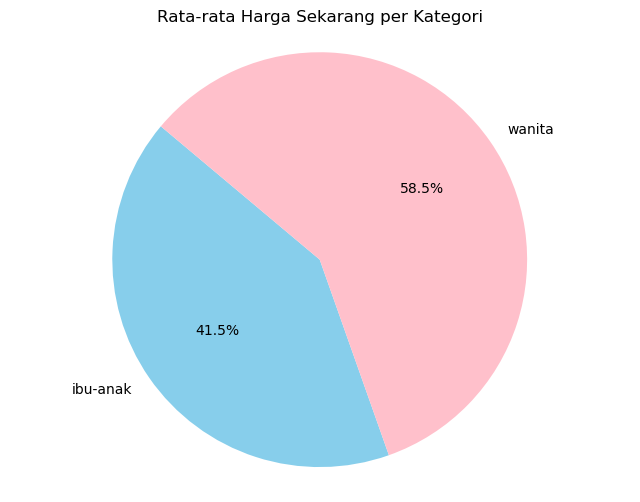

In [316]:
plt.figure(figsize=(8, 6))
plt.pie(mean_kategori, labels=mean_kategori.index, autopct='%1.1f%%', colors=['skyblue', 'pink'], startangle=140)
plt.title('Rata-rata Harga Sekarang per Kategori')
plt.axis('equal')  # Agar pie chart berbentuk lingkaran
plt.show()

In [317]:
kategori_counts = produk_habis['Kategori'].value_counts()
print("Kecenderungan pembelian barang berdasarkan kategori:")
print(kategori_counts)

Kecenderungan pembelian barang berdasarkan kategori:
wanita      391
ibu-anak    100
Name: Kategori, dtype: int64


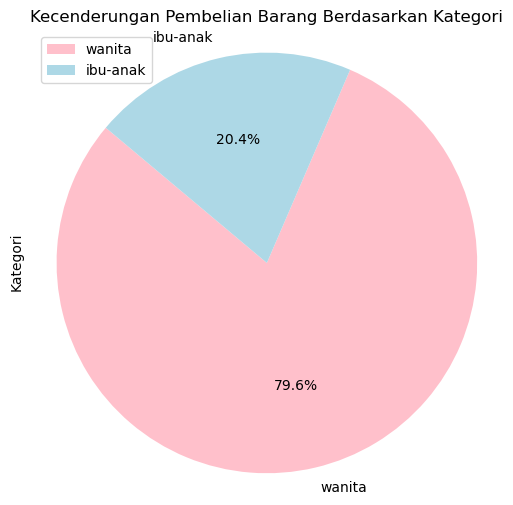

In [318]:
# Visualisasi data menggunakan pie chart
plt.figure(figsize=(6, 6))
kategori_counts.plot(kind='pie', autopct='%1.1f%%', colors=['pink','lightblue'], startangle=140)
plt.title("Kecenderungan Pembelian Barang Berdasarkan Kategori")
plt.axis('equal')  # Agar pie chart berbentuk lingkaran
plt.legend(labels=kategori_counts.index, loc="upper left")
plt.show()

In [319]:
# 1. Analisis kecenderungan pembelian barang berdasarkan kategori "Wanita" dan "Ibu-anak"
kategori_counts = filtering['Kategori'].value_counts()
print("Kecenderungan pembelian barang berdasarkan kategori:")
print(kategori_counts)

Kecenderungan pembelian barang berdasarkan kategori:
wanita      1267
ibu-anak     341
Name: Kategori, dtype: int64


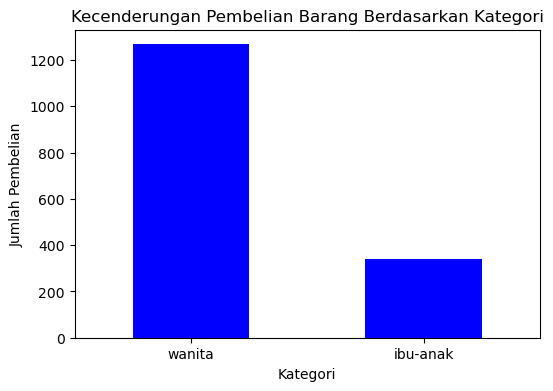

In [320]:
# Visualisasi data
# Visualisasi kecenderungan pembelian barang berdasarkan kategori
plt.figure(figsize=(6, 4))
kategori_counts.plot(kind='bar', color='blue')
plt.title("Kecenderungan Pembelian Barang Berdasarkan Kategori")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Pembelian")
plt.xticks(rotation=0)
plt.show()

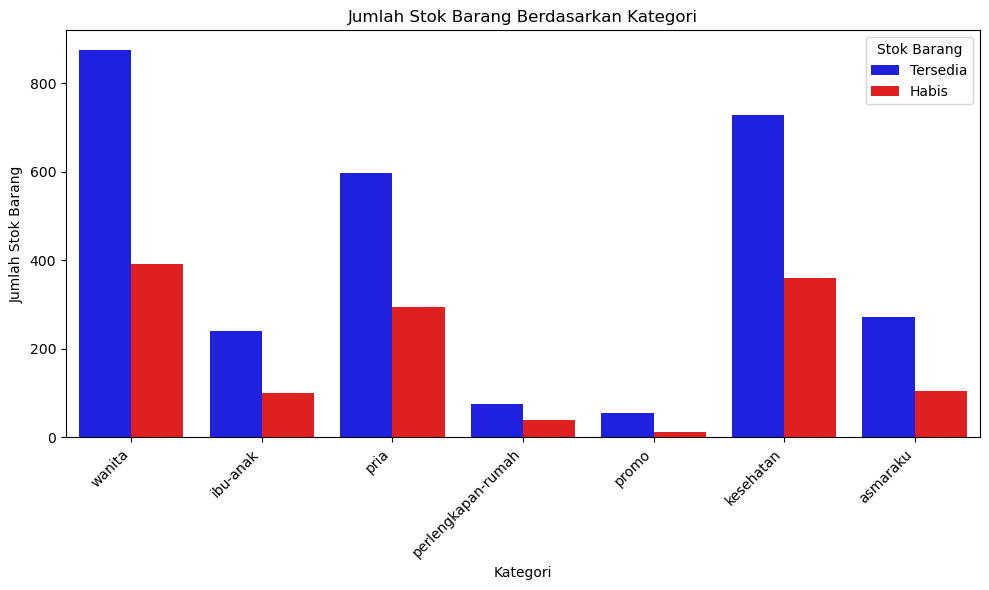

In [321]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data hanya untuk stok barang yang "Tersedia" dan "Habis"
data_filtered = df[df['Stok Barang'].isin(['Tersedia', 'Habis'])]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_filtered, x='Kategori', hue='Stok Barang', palette=['blue', 'red'])
plt.xlabel('Kategori')
plt.ylabel('Jumlah Stok Barang')
plt.title('Jumlah Stok Barang Berdasarkan Kategori')
plt.legend(title='Stok Barang', labels=['Tersedia', 'Habis'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Pengaruh diskon terhadap kelangsungan pembelian di dua kategori:
Kategori
ibu-anak    12.961877
wanita      15.284136
Name: Diskon (%), dtype: float64


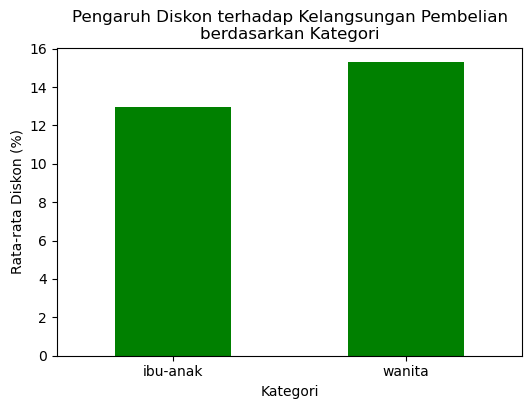

In [322]:

# 2. Analisis pengaruh diskon terhadap kelangsungan pembelian di dua kategori tersebut
diskon_grouped = filtering.groupby('Kategori')['Diskon (%)'].mean()
print("\nPengaruh diskon terhadap kelangsungan pembelian di dua kategori:")
print(diskon_grouped)


# Visualisasi pengaruh diskon terhadap kelangsungan pembelian di dua kategori
plt.figure(figsize=(6, 4))
diskon_grouped.plot(kind='bar', color='green')
plt.title("Pengaruh Diskon terhadap Kelangsungan Pembelian\nberdasarkan Kategori")
plt.xlabel("Kategori")
plt.ylabel("Rata-rata Diskon (%)")
plt.xticks(rotation=0)
plt.show()


In [327]:
# 3. Produk yang sering kehabisan stok dan memerlukan manajemen persediaan yang lebih baik
produk_kehabisan_stok = filtering[filtering['Stok Barang'] == 'Habis']
print("\nProduk yang sering kehabisan stok:")
produk_kehabisan_stok.reset_index()



Produk yang sering kehabisan stok:


,index,Nama Produk,Kategori,Harga Sekarang,Harga Reguler,Diskon (%),Hemat Diskon,Rating,Ulasan,Stok Barang,URL Produk
0,3,Avoskin Intensive Nourishing Eye Cream - 10 gr,wanita,133800,171600,22,37800,0.0,0,Habis,https://favo.id/products/avoskin-intensive-nou...
1,12,Dettol Bar Soap Cool 100 gr (3 Pcs),wanita,23300,30000,22,6700,0.0,0,Habis,https://favo.id/products/dettol-bar-soap-cool-...
2,16,Dettol Bar Soap Skincare 100 gr (3 Pcs),wanita,25500,30000,15,4500,0.0,0,Habis,https://favo.id/products/dettol-bar-soap-skinc...
3,21,Himalaya Herbal Gentle Exfoliating Daily Face ...,wanita,21200,25900,18,4700,4.0,1,Habis,https://favo.id/products/himalaya-herbal-gentl...
4,27,Nivea Whitening Hijab Fresh Deodorant Roll On ...,wanita,24000,25800,6,1800,0.0,0,Habis,https://favo.id/products/nivea-whitening-hijab...
...,...,...,...,...,...,...,...,...,...,...,...
486,1592,Probaby Bath Plus Anise Oil Pouch - 230 mL,ibu-anak,20400,25500,20,5100,0.0,0,Habis,https://favo.id/products/probaby-bath-plus-ani...
487,1594,Konicare Pembersih Tangan - 60 mL,ibu-anak,10400,11800,11,1400,0.0,0,Habis,https://favo.id/products/konicare-pembersih-ta...
488,1597,Kodomo Zigzag Toothbrush - 1 Pcs,ibu-anak,3000,5000,40,2000,0.0,0,Habis,https://favo.id/products/kodomo-zigzag-toothbr...
489,1598,Kodomo Zigzag 2in1 Toothbrush & Toothpaste - 1...,ibu-anak,7800,10600,26,2800,0.0,0,Habis,https://favo.id/products/kodomo-zigzag-2in1-to...


In [328]:
print(pyf.figlet_format('4.  PIVOT TABLE'))

print(pyf.figlet_format('-----------'))

 _  _       ____ _____     _____ _____   _____  _    ____  _     _____ 
| || |     |  _ \_ _\ \   / / _ \_   _| |_   _|/ \  | __ )| |   | ____|
| || |_    | |_) | | \ \ / / | | || |     | | / _ \ |  _ \| |   |  _|  
|__   _|   |  __/| |  \ V /| |_| || |     | |/ ___ \| |_) | |___| |___ 
   |_|(_)  |_|  |___|  \_/  \___/ |_|     |_/_/   \_\____/|_____|_____|
                                                                       

                                                                   
                                                                   
 _____ _____ _____ _____ _____ _____ _____ _____ _____ _____ _____ 
|_____|_____|_____|_____|_____|_____|_____|_____|_____|_____|_____|
                                                                   
                                                                   



In [329]:
df4 = df3.copy()

In [350]:
# Mengganti nilai pada kolom "Kategori" dengan "Wanita" atau "Ibu-anak" sesuai dengan data yang sesuai
df4['Kategori'] = df4['Kategori'].replace({'wanita': 'Wanita', 'ibu-anak': 'Ibu-anak'})

# Buat pivot table untuk menghitung jumlah pembelian berdasarkan kategori "Wanita" dan "Ibu-anak" 
pivot_table = df4.pivot_table(index=['Kategori', 'Kategori Produk','Kategori Harga', 'Stok Barang'], values=['Harga Sekarang', 'Harga Reguler', 'Diskon (%)', 'Hemat Diskon', 'Rating', 'Ulasan'],
                             aggfunc={'Harga Sekarang': 'mean', 'Harga Reguler': 'mean', 'Diskon (%)': 'mean', 'Hemat Diskon': 'sum', 'Rating': 'mean', 'Ulasan': 'sum'})

pivot_table

Diskon (%)  \
Kategori Kategori Produk            Kategori Harga Stok Barang               
Ibu-anak Health Care                Mahal          Habis         11.000000   
                                    Murah          Habis         54.000000   
                                                   Tersedia      12.000000   
                                    Sedang         Habis         11.000000   
         Home Care                  Murah          Tersedia      60.000000   
         Ibu hamil & menyusui       Mahal          Habis         21.500000   
                                    Murah          Habis         17.888889   
                                                   Tersedia       8.810345   
                                    Sedang         Habis          9.666667   
                                                   Tersedia      20.222222   
         Perawatan Kewanitaan       Murah          Tersedia      30.200000   
         Perlengkapan Bayi dan Anak Murah          Habis         13.621951   
                                                   Tersedia      12.354037   
         Personal Care              Murah          Tersedia       5.000000   
         Skincare                   Murah          Tersedia      27.000000   
                                    Sedang         Tersedia      11.000000   
Wanita   Bodycare                   Mahal          Habis         26.333333   
                                                   Tersedia      26.500000   
                                    Murah          Habis         16.776000   
                                                   Tersedia      14.803150   
                                    Sedang         Habis          7.333333   
                                                   Tersedia      11.000000   
         Haircare                   Mahal          Habis         10.842105   
                                    Murah          Habis         20.956522   
                                                   Tersedia      17.970149   
                                    Sedang         Habis          9.000000   
         Health Care                Mahal          Habis         50.000000   
                                    Murah          Habis          7.625000   
                                                   Tersedia      18.470588   
                                    Sedang         Tersedia       0.000000   
         Home Care                  Murah          Habis         12.000000   
                                                   Tersedia      24.538462   
         Ibu hamil & menyusui       Murah          Tersedia      12.000000   
         Parfum                     Mahal          Habis         17.000000   
                                    Murah          Habis         16.705882   
                                                   Tersedia      19.266667   
                                    Sedang         Habis          0.000000   
                                                   Tersedia       1.000000   
         Perawatan Kewanitaan       Mahal          Habis         10.500000   
                                                   Tersedia       7.333333   
                                    Murah          Habis         11.150943   
                                                   Tersedia      12.796610   
         Perlengkapan Bayi dan Anak Murah          Habis         23.000000   
                                                   Tersedia      14.666667   
                                    Sedang         Tersedia       9.500000   
         Personal Care              Murah          Habis         15.390244   
                                                   Tersedia      14.240506   
         Skincare                   Mahal          Habis          1.000000   
                                                   Tersedia       9.785714   
                                    Murah          Habis         17.632911   
        

In [351]:
pivot_table.reset_index(inplace=True)

In [352]:
df_sorting = pivot_table.sort_values(by=['Rating', 'Ulasan'], ascending=False)
df_sorting.reset_index(drop=True, inplace=True)
df_sorting

,Kategori,Kategori Produk,Kategori Harga,Stok Barang,Diskon (%),Harga Reguler,Harga Sekarang,Hemat Diskon,Rating,Ulasan
0,Wanita,Bodycare,Sedang,Tersedia,11.000000,2.385000e+05,210700.000000,27800.0,5.000000,2
1,Wanita,Parfum,Mahal,Habis,17.000000,5.500000e+05,454400.000000,95600.0,5.000000,1
2,Wanita,Perawatan Kewanitaan,Mahal,Tersedia,7.333333,4.108000e+05,381666.666667,87400.0,3.000000,4
3,Wanita,Perlengkapan Bayi dan Anak,Sedang,Tersedia,9.500000,2.126000e+05,192100.000000,41000.0,2.350000,3
4,Wanita,Personal Care,Murah,Tersedia,14.240506,2.294430e+04,19451.898734,275900.0,2.017722,90
5,Ibu-anak,Ibu hamil & menyusui,Mahal,Habis,21.500000,4.835000e+05,377950.000000,211100.0,2.000000,1
6,Ibu-anak,Health Care,Murah,Tersedia,12.000000,4.920000e+04,40966.666667,24700.0,1.666667,1
7,Wanita,Bodycare,Sedang,Habis,7.333333,2.875000e+05,264633.333333,68600.0,1.666667,1
8,Wanita,Bodycare,Murah,Habis,16.776000,3.132080e+04,25883.200000,679700.0,1.087200,68
9,Wanita,Skincare,Murah,Tersedia,13.535398,4.565704e+04,38212.831858,1682390.0,1.068142,85


In [353]:
# Mengganti nilai pada kolom "Kategori" dengan "Wanita" atau "Ibu-anak" sesuai dengan data yang sesuai
df4['Kategori'] = df4['Kategori'].replace({'wanita': 'Wanita', 'ibu-anak': 'Ibu-anak'})

# Buat pivot table untuk menghitung jumlah pembelian berdasarkan kategori "Wanita" dan "Ibu-anak" 
pivot_table = df4.pivot_table(index=['Kategori', 'Kategori Produk','Kategori Harga', 'Stok Barang'], 
                              values=['Harga Sekarang', 'Harga Reguler', 'Diskon (%)', 'Hemat Diskon', 'Rating', 'Ulasan'],
                             aggfunc={'Harga Sekarang': 'mean', 'Harga Reguler': 'mean', 'Diskon (%)': 'mean',
                                      'Hemat Diskon': 'sum', 'Rating': 'mean', 'Ulasan': 'sum'})

pivot_table

Diskon (%)  \
Kategori Kategori Produk            Kategori Harga Stok Barang               
Ibu-anak Health Care                Mahal          Habis         11.000000   
                                    Murah          Habis         54.000000   
                                                   Tersedia      12.000000   
                                    Sedang         Habis         11.000000   
         Home Care                  Murah          Tersedia      60.000000   
         Ibu hamil & menyusui       Mahal          Habis         21.500000   
                                    Murah          Habis         17.888889   
                                                   Tersedia       8.810345   
                                    Sedang         Habis          9.666667   
                                                   Tersedia      20.222222   
         Perawatan Kewanitaan       Murah          Tersedia      30.200000   
         Perlengkapan Bayi dan Anak Murah          Habis         13.621951   
                                                   Tersedia      12.354037   
         Personal Care              Murah          Tersedia       5.000000   
         Skincare                   Murah          Tersedia      27.000000   
                                    Sedang         Tersedia      11.000000   
Wanita   Bodycare                   Mahal          Habis         26.333333   
                                                   Tersedia      26.500000   
                                    Murah          Habis         16.776000   
                                                   Tersedia      14.803150   
                                    Sedang         Habis          7.333333   
                                                   Tersedia      11.000000   
         Haircare                   Mahal          Habis         10.842105   
                                    Murah          Habis         20.956522   
                                                   Tersedia      17.970149   
                                    Sedang         Habis          9.000000   
         Health Care                Mahal          Habis         50.000000   
                                    Murah          Habis          7.625000   
                                                   Tersedia      18.470588   
                                    Sedang         Tersedia       0.000000   
         Home Care                  Murah          Habis         12.000000   
                                                   Tersedia      24.538462   
         Ibu hamil & menyusui       Murah          Tersedia      12.000000   
         Parfum                     Mahal          Habis         17.000000   
                                    Murah          Habis         16.705882   
                                                   Tersedia      19.266667   
                                    Sedang         Habis          0.000000   
                                                   Tersedia       1.000000   
         Perawatan Kewanitaan       Mahal          Habis         10.500000   
                                                   Tersedia       7.333333   
                                    Murah          Habis         11.150943   
                                                   Tersedia      12.796610   
         Perlengkapan Bayi dan Anak Murah          Habis         23.000000   
                                                   Tersedia      14.666667   
                                    Sedang         Tersedia       9.500000   
         Personal Care              Murah          Habis         15.390244   
                                                   Tersedia      14.240506   
         Skincare                   Mahal          Habis          1.000000   
                                                   Tersedia       9.785714   
                                    Murah          Habis         17.632911   
        

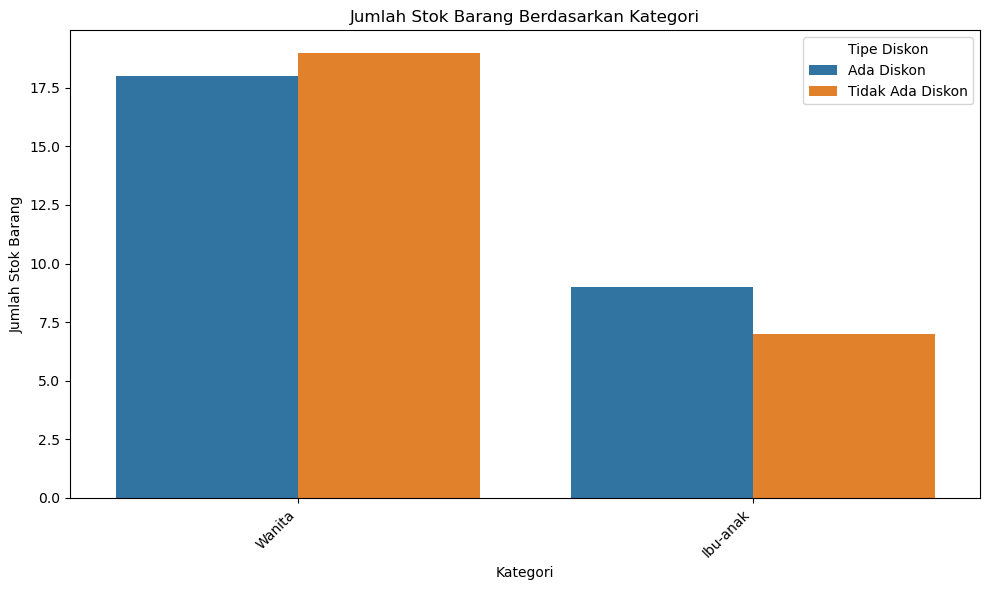

In [354]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data berdasarkan kategori yang diinginkan
data_filtered = df_sorting[df_sorting['Kategori'].isin(['Wanita', 'Ibu-anak'])]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_filtered, x='Kategori', hue='Stok Barang', palette='tab10')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Stok Barang')
plt.title('Jumlah Stok Barang Berdasarkan Kategori')
plt.legend(title='Tipe Diskon', labels=['Ada Diskon', 'Tidak Ada Diskon'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [334]:
print(pyf.figlet_format('5.  TRANSFORMASI DATA'))

print(pyf.figlet_format('-----------'))

 ____    
| ___|   
|___ \   
 ___) |  
|____(_) 
         
 _____ ____      _    _   _ ____  _____ ___  ____  __  __    _    ____ ___ 
|_   _|  _ \    / \  | \ | / ___||  ___/ _ \|  _ \|  \/  |  / \  / ___|_ _|
  | | | |_) |  / _ \ |  \| \___ \| |_ | | | | |_) | |\/| | / _ \ \___ \| | 
  | | |  _ <  / ___ \| |\  |___) |  _|| |_| |  _ <| |  | |/ ___ \ ___) | | 
  |_| |_| \_\/_/   \_\_| \_|____/|_|   \___/|_| \_\_|  |_/_/   \_\____/___|
                                                                           
 ____    _  _____  _    
|  _ \  / \|_   _|/ \   
| | | |/ _ \ | | / _ \  
| |_| / ___ \| |/ ___ \ 
|____/_/   \_\_/_/   \_\
                        

                                                                   
                                                                   
 _____ _____ _____ _____ _____ _____ _____ _____ _____ _____ _____ 
|_____|_____|_____|_____|_____|_____|_____|_____|_____|_____|_____|
                                                             

In [335]:
df_one_hot_encoding = df_sorting.copy()

In [336]:
from sklearn.preprocessing import LabelEncoder

kolom_one_hot_encoding = ['Stok Barang']
df_encoded = pd.get_dummies(df_one_hot_encoding[kolom_one_hot_encoding])

#df_encoded

df_one_hot_encoding = pd.concat([df_one_hot_encoding, df_encoded], axis=1)
df_one_hot_encoding.drop(columns = kolom_one_hot_encoding ,inplace = True)
df_one_hot_encoding

,Kategori,Kategori Produk,Kategori Harga,Diskon (%),Harga Reguler,Harga Sekarang,Hemat Diskon,Rating,Ulasan,Stok Barang_Habis,Stok Barang_Tersedia
0,Wanita,Bodycare,Sedang,11.000000,2.385000e+05,210700.000000,27800.0,5.000000,2,0,1
1,Wanita,Parfum,Mahal,17.000000,5.500000e+05,454400.000000,95600.0,5.000000,1,1,0
2,Wanita,Perawatan Kewanitaan,Mahal,7.333333,4.108000e+05,381666.666667,87400.0,3.000000,4,0,1
3,Wanita,Perlengkapan Bayi dan Anak,Sedang,9.500000,2.126000e+05,192100.000000,41000.0,2.350000,3,0,1
4,Wanita,Personal Care,Murah,14.240506,2.294430e+04,19451.898734,275900.0,2.017722,90,0,1
5,Ibu-anak,Ibu hamil & menyusui,Mahal,21.500000,4.835000e+05,377950.000000,211100.0,2.000000,1,1,0
6,Ibu-anak,Health Care,Murah,12.000000,4.920000e+04,40966.666667,24700.0,1.666667,1,0,1
7,Wanita,Bodycare,Sedang,7.333333,2.875000e+05,264633.333333,68600.0,1.666667,1,1,0
8,Wanita,Bodycare,Murah,16.776000,3.132080e+04,25883.200000,679700.0,1.087200,68,1,0
9,Wanita,Skincare,Murah,13.535398,4.565704e+04,38212.831858,1682390.0,1.068142,85,0,1


In [337]:
df5 = df_one_hot_encoding.copy()

In [338]:
print(pyf.figlet_format('6. DETEKSI OUTLIERS'))

print(pyf.figlet_format('-----------'))

  __      ____  _____ _____ _____ _  ______ ___ 
 / /_    |  _ \| ____|_   _| ____| |/ / ___|_ _|
| '_ \   | | | |  _|   | | |  _| | ' /\___ \| | 
| (_) |  | |_| | |___  | | | |___| . \ ___) | | 
 \___(_) |____/|_____| |_| |_____|_|\_\____/___|
                                                
  ___  _   _ _____ _     ___ _____ ____  ____  
 / _ \| | | |_   _| |   |_ _| ____|  _ \/ ___| 
| | | | | | | | | | |    | ||  _| | |_) \___ \ 
| |_| | |_| | | | | |___ | || |___|  _ < ___) |
 \___/ \___/  |_| |_____|___|_____|_| \_\____/ 
                                               

                                                                   
                                                                   
 _____ _____ _____ _____ _____ _____ _____ _____ _____ _____ _____ 
|_____|_____|_____|_____|_____|_____|_____|_____|_____|_____|_____|
                                                                   
                                                                   



In [339]:
def detect_outliers_iqr(df):
    # Disini didapat Quartil 1 dan Quartil 3
    q1 = np.percentile(df, 25)
    q3 = np.percentile(df, 75)

    # Menghitung IQR - Interquartil Range - Jangkauan
    iqr = q3 - q1

    # Menghitung Batas atas dan Bawahnya, untuk menentukan jika ada nilai yang lebih dari ini maka dianggap outlier.
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Nah disini seperti yang aku bilang diatas adalah untuk mengidentifikasi outlier
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    # jika x lebih kecil dari batas bawah atau lebih besar dari batas atas maka dianggap outlier

    return outliers

# Contoh penggunaan
data = df5['Diskon (%)']
outliers = detect_outliers_iqr(data)
print("Outliers 1:", outliers)

data = df5['Harga Reguler']
outliers = detect_outliers_iqr(data)
print("Outliers 2:", outliers)

data = df5['Harga Sekarang']
outliers = detect_outliers_iqr(data)
print("Outliers 3:", outliers)

data = df5['Hemat Diskon']
outliers = detect_outliers_iqr(data)
print("Outliers 4:", outliers)

data = df5['Rating']
outliers = detect_outliers_iqr(data)
print("Outliers 5:", outliers)

data = df5['Ulasan']
outliers = detect_outliers_iqr(data)
print("Outliers 6:", outliers)

Outliers 1: [54.0, 60.0, 50.0]
Outliers 2: [1724900.0]
Outliers 3: [856900.0]
Outliers 4: [1682390.0, 1366415.0, 1776500.0, 1327800.0, 1031260.0, 2291150.0]
Outliers 5: [5.0, 5.0, 3.0, 2.35]
Outliers 6: [90, 68, 85, 111, 18, 39, 16]


In [346]:
from scipy import stats

columns_to_zscore = ['Harga Reguler', 'Harga Sekarang', 'Hemat Diskon', 'Rating', 'Ulasan']

# Fungsi untuk melakukan Z-score pada kolom-kolom yang diberikan
def calculate_zscore(df5, columns):
    for column in columns:
        # Fill missing values with the mean of the column
        df[column].fillna(df[column].mean(), inplace=True)
        df[column + '_zscore'] = stats.zscore(df5[column], nan_policy='omit')
    return df

# Panggil fungsi calculate_zscore
df_zscore = calculate_zscore(df5, columns_to_zscore)

# Tampilkan dataframe setelah ditambahkan kolom Z-score
df_zscore

,Nama Produk,Kategori,Harga Sekarang,Harga Reguler,Diskon (%),Hemat Diskon,Rating,Ulasan,Stok Barang,URL Produk,Harga Reguler_zscore,Harga Sekarang_zscore,Hemat Diskon_zscore,Rating_zscore,Ulasan_zscore
0,Eucalie Organic Anti Aging Package,wanita,566400,568000,0,1600,0.0,0,Tersedia,https://favo.id/products/eucalie-organic-anti-...,0.110630,0.269240,-0.624888,3.935438,-0.305988
1,Eucalie Exclusive Anti Aging Package,wanita,536400,547000,1,10600,0.0,0,Tersedia,https://favo.id/products/eucalie-exclusive-ant...,1.234917,1.653432,-0.491128,3.935438,-0.347894
2,Avoskin Advance Action Eye Ampoule - 12 mL,wanita,185800,214800,13,29000,0.0,0,Tersedia,https://favo.id/products/avoskin-advance-actio...,0.732507,1.240314,-0.507305,2.141099,-0.222178
3,Avoskin Intensive Nourishing Eye Cream - 10 gr,wanita,133800,171600,22,37800,0.0,0,Habis,https://favo.id/products/avoskin-intensive-nou...,0.017150,0.163593,-0.598846,1.557939,-0.264083
4,Sebamed Clear Face Foam - 150 ML,wanita,244500,276800,11,32300,5.0,1,Tersedia,https://favo.id/products/sebamed-clear-face-fo...,-0.667369,-0.817031,-0.135420,1.259829,3.381686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,Jo Cocktails Mimosa Personal Lubricant - 60 mL,asmaraku,216700,260000,16,43300,0.0,0,Habis,https://favo.id/products/jo-cocktails-mimosa-p...,NaN,NaN,NaN,NaN,NaN
4146,Jo Cocktails Mai Tai Personal Lubricant - 60 mL,asmaraku,216700,260000,16,43300,0.0,0,Habis,https://favo.id/products/jo-cocktails-mai-tai-...,NaN,NaN,NaN,NaN,NaN
4147,Jo Cocktails Cosmopolitan Personal Lubricant ...,asmaraku,216700,260000,16,43300,0.0,0,Habis,https://favo.id/products/jo-cocktails-cosmopol...,NaN,NaN,NaN,NaN,NaN
4148,Jo Cocktails Mojito Personal Lubricant - 60 mL,asmaraku,216700,260000,16,43300,0.0,0,Habis,https://favo.id/products/jo-cocktails-mojito-p...,NaN,NaN,NaN,NaN,NaN


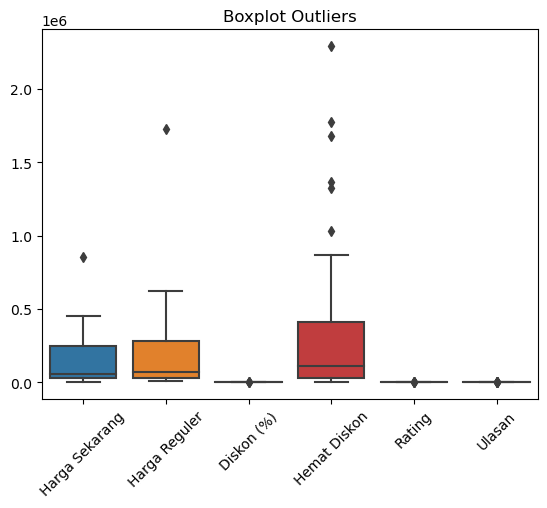

In [347]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numeric columns for boxplot
boxplot_columns = ['Harga Sekarang', 'Harga Reguler', 'Diskon (%)', 'Hemat Diskon', 'Rating', 'Ulasan']

# Plot the boxplot
sns.boxplot(data=df_z_score[boxplot_columns])
plt.title("Boxplot Outliers")
plt.xticks(rotation=45)
plt.show()